<a href="https://colab.research.google.com/github/itsmaul/bigdata-casestudy/blob/main/notebook_kel3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BIG DATA ANALYSIS: HOUSE SALES DATASET**

**Kelompok 3 (Moga IPK Bagus)**
1. 2210631170005 - Alma Alifya Zafira
2. 2210631170006 - Alustina Suci Manah
3. 2210631170099 - Ridhaka Gina Amalia
4. 2210631170100 - Risma Auliya Salsabilla
5. 2210631170103 - Siti Zulhi Nirma Saidah

## **Business Case Evaluation (Case Study)**

Pengembang properti perlu memahami tren harga rumah, ukuran lahan, dan faktor lain yang mempengaruhi nilai jual properti. Dengan menganalisis dataset ini, mereka dapat mengidentifikasi peluang investasi dan menentukan strategi harga untuk proyek perumahan baru. Oleh karena itu, ada beberapa pertanyaan yang diajukan oleh pengembang properti berdasarkan dataset yang ada, yaitu:

1. Bagaimana tren harga jual rumah berdasarkan tahun dan bulan penjualan?
2. Apakah ada hubungan antara ukuran lahan dan harga jual rumah?
3. Bagaimana perbandingan harga rumah berdasarkan jenis properti?
4. Faktor apa yang paling mempengaruhi harga jual rumah di pasar saat ini?
5. Bagaimana pengaruh indeks nilai rumah terhadap harga jual properti?

## **Dataset yang Digunakan**

Sumber: https://www.kaggle.com/datasets/feeldidaxie/king-county-house-sales-usa

## **Import Library yang Digunakan**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Acquisition & Filtering**

### **Gathering Data**

**Memuat Dataset pada Tabel `house_df`**







In [ ]:
house_df = pd.read_csv("https://raw.githubusercontent.com/itsmaul/bigdata-casestudy/main/data/dataset2_housesales.csv")
house_df.head(10)

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
0,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
1,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
3,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
4,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False
5,2009-03-30,349900,3600090,Townhouse,2009-03-01,369800,0.849724,411781.0,1,1012,...,1.50,2,8,2008,0,0,170000,207000,98144,True
6,2013-08-28,327500,3800004,Single Family,2013-08-01,374300,0.860064,380785.0,1,34465,...,1.50,3,8,1961,0,0,165000,227000,98178,False
7,2007-05-24,347000,3800009,Single Family,2007-05-01,432100,0.992877,349489.0,1,14659,...,1.75,4,7,1963,0,0,115000,154000,98178,False
8,2006-09-22,220400,6600055,Single Family,2006-09-01,414800,0.953125,231239.0,1,5324,...,1.00,2,6,1930,0,3,90000,75000,98032,False
9,2006-08-22,437500,7200080,Multiplex,2006-08-01,411100,0.944623,463148.0,2,10585,...,2.00,4,6,1924,0,0,124000,116000,98055,False


**Insight:**
*   Terdapat nama kolom yang masih berbentuk singkatan sehingga kurang jelas untuk melakukan analisis.



### **Assessing Data**

**Membuat Function Untuk:**
1.   Melihat Info Tabel
2.   Mengecek Missing Values
3.   Mengecek Duplicate Data
4.   Parameter Statistika

In [ ]:
def assessing_data(df):
    print(f"\n---TABLE INFO---\n")
    df.info()

    print(f"\n---MISSING VALUES---\n")
    print(df.isna().sum())

    print(f"\n---DUPLICATE DATA---\n")
    print(df.duplicated().sum())

    print(f"\n---STATISTICS PARAMETER---\n")
    print(df.describe())

**Menilai Data Tabel `house_df`**

In [ ]:
assessing_data(house_df)


---TABLE INFO---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22687 entries, 0 to 22686
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DocumentDate     22687 non-null  object 
 1   SalePrice        22687 non-null  int64  
 2   PropertyID       22687 non-null  int64  
 3   PropertyType     22687 non-null  object 
 4   ym               22687 non-null  object 
 5   zhvi_px          22687 non-null  int64  
 6   zhvi_idx         22687 non-null  float64
 7   AdjSalePrice     22687 non-null  float64
 8   NbrLivingUnits   22687 non-null  int64  
 9   SqFtLot          22687 non-null  int64  
 10  SqFtTotLiving    22687 non-null  int64  
 11  SqFtFinBasement  22687 non-null  int64  
 12  Bathrooms        22687 non-null  float64
 13  Bedrooms         22687 non-null  int64  
 14  BldgGrade        22687 non-null  int64  
 15  YrBuilt          22687 non-null  int64  
 16  YrRenovated      22687 non-null  int64 

**Insight:**
*   Jumlah seluruh data adalah 22.687.
*   Terdapat beberapa variabel dengan tipe data yang tidak sesuai.
*   Tidak ada nilai kolom yang kosong.
*   Tidak ada duplikasi data.



### **Cleaning and Transformation Data**

**Mengganti Nama Kolom yang Kurang Jelas**

In [ ]:
house_df.rename(columns={'DocumentDate':'TransactionDate','ym':'SaleStartDate',
                         'NbrLivingUnits':'NumberOfUnits','BldgGrade':'BuildingGrade',
                         'YrBuilt':'YearOfBuilt','YrRenovated':'YearOfRenovated',
                         'LandVal':'LandValue','ImpsVal':'ImprovementsValue',
                         'NbrLivingUnits':'NumberOfUnits','ZipCode':'PostalCode'}, inplace=True)

**Insight:**
*   Standarisasi nama kolom dilakukan untuk memudahkan pemahaman dalam proses analisis.






## **Data Extraction**

**Mengganti Tipe Data yang Belum Sesuai**

In [ ]:
# object to date

columns = ['TransactionDate', 'SaleStartDate']

for column in columns:
    house_df[column] = pd.to_datetime(house_df[column])

In [ ]:
# object to category

house_df['PropertyType'] = house_df['PropertyType'].astype("category")

**Mengklasifikasikan Kolom**

In [ ]:
numerical_cols = house_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
date_category_cols = house_df.select_dtypes(include=['datetime', 'category']).columns.tolist()

print("Kolom Numerik:", numerical_cols)
print("Kolom Tanggal dan Kategorik:", date_category_cols)

Kolom Numerik: ['SalePrice', 'PropertyID', 'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NumberOfUnits', 'SqFtLot', 'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms', 'BuildingGrade', 'YearOfBuilt', 'YearOfRenovated', 'TrafficNoise', 'LandValue', 'ImprovementsValue', 'PostalCode']
Kolom Tanggal dan Kategorik: ['TransactionDate', 'PropertyType', 'SaleStartDate']


**Insight:**
*   Konversi tipe data `TransactionDate` dan `SaleStartDate` ke format datetime dilakukan untuk memudahkan analisis berdasarkan waktu.
*   Konversi tipe data `PropertyType` ke format kategori untuk mempercepat analisis perbandingan harga berdasarkan jenis properti.
*   Klasifikasi kolom agar memudahkan proses analisis.

## **Data Validation**

**Menilai Data `house_df`**

In [ ]:
assessing_data(house_df)


---TABLE INFO---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22687 entries, 0 to 22686
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TransactionDate    22687 non-null  datetime64[ns]
 1   SalePrice          22687 non-null  int64         
 2   PropertyID         22687 non-null  int64         
 3   PropertyType       22687 non-null  category      
 4   SaleStartDate      22687 non-null  datetime64[ns]
 5   zhvi_px            22687 non-null  int64         
 6   zhvi_idx           22687 non-null  float64       
 7   AdjSalePrice       22687 non-null  float64       
 8   NumberOfUnits      22687 non-null  int64         
 9   SqFtLot            22687 non-null  int64         
 10  SqFtTotLiving      22687 non-null  int64         
 11  SqFtFinBasement    22687 non-null  int64         
 12  Bathrooms          22687 non-null  float64       
 13  Bedrooms           22687 non-null  int64  

In [ ]:
house_df.head(10)

,TransactionDate,SalePrice,PropertyID,PropertyType,SaleStartDate,zhvi_px,zhvi_idx,AdjSalePrice,NumberOfUnits,SqFtLot,...,Bathrooms,Bedrooms,BuildingGrade,YearOfBuilt,YearOfRenovated,TrafficNoise,LandValue,ImprovementsValue,PostalCode,NewConstruction
0,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
1,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
3,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
4,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False
5,2009-03-30,349900,3600090,Townhouse,2009-03-01,369800,0.849724,411781.0,1,1012,...,1.50,2,8,2008,0,0,170000,207000,98144,True
6,2013-08-28,327500,3800004,Single Family,2013-08-01,374300,0.860064,380785.0,1,34465,...,1.50,3,8,1961,0,0,165000,227000,98178,False
7,2007-05-24,347000,3800009,Single Family,2007-05-01,432100,0.992877,349489.0,1,14659,...,1.75,4,7,1963,0,0,115000,154000,98178,False
8,2006-09-22,220400,6600055,Single Family,2006-09-01,414800,0.953125,231239.0,1,5324,...,1.00,2,6,1930,0,3,90000,75000,98032,False
9,2006-08-22,437500,7200080,Multiplex,2006-08-01,411100,0.944623,463148.0,2,10585,...,2.00,4,6,1924,0,0,124000,116000,98055,False


**Insight:**
*   Standarisasi nama kolom dan konversi tipe data berhasil dilakukan
*   Proses dapat lebih mudah dilakukan karena tipe data masing-masing kolom sudah sesuai dengan yang dibutuhkan.



## **Data Aggregation, Representation, and Analysis**

### **Confirmatory Data**

**Hipotesis:**
*   PropertyID yang sama bisa muncul lebih dari sekali karena rumah tersebut dijual lebih dari satu kali pada waktu yang berbeda.
*   Variabel SqFtTotLiving (luas bangunan) dan BuildingGrade memiliki korelasi positif dengan SalePrice (harga jual).
*   YearOfBuilt (tahun dibangun) memiliki korelasi positif dengan SalePrice.
*   TrafficNoise memiliki korelasi negatif dengan SalePrice.
*   SqFtLot (luas tanah) memiliki korelasi yang lebih kecil dibanding SqFtTotLiving terhadap SalePrice.



### **Exploratory Data**

**Mengecek Kolom Unik `PropertyID`**

In [ ]:
house_df.PropertyID.is_unique

False

In [ ]:
if house_df['PropertyID'].duplicated().any():
    print("Ada PropertyID yang duplikat dalam dataset.")
else:
    print("Tidak ada PropertyID yang duplikat dalam dataset.")

Ada PropertyID yang duplikat dalam dataset.


In [ ]:
duplicate_properties = house_df[house_df['PropertyID'].duplicated(keep=False)]
print(duplicate_properties)

      TransactionDate  SalePrice  PropertyID   PropertyType SaleStartDate  \
12         2008-06-26     292000     7400062  Single Family    2008-06-01   
13         2014-05-21     299800     7400062  Single Family    2014-05-01   
24         2008-04-21     635000    11500510  Single Family    2008-04-01   
25         2009-08-25     520000    11500510  Single Family    2009-08-01   
38         2006-01-12     330000    11900050  Single Family    2006-01-01   
...               ...        ...         ...            ...           ...   
22625      2008-12-22     920000  9831200525  Single Family    2008-12-01   
22664      2010-07-21     305000  9839300875  Single Family    2010-07-01   
22665      2010-12-17     585000  9839300875  Single Family    2010-12-01   
22666      2008-04-17     590000  9839301055  Single Family    2008-04-01   
22667      2013-05-28     607500  9839301055  Single Family    2013-05-01   

       zhvi_px  zhvi_idx  AdjSalePrice  NumberOfUnits  SqFtLot  ...  \
12  

**Insight:**
*   Berdasarkan eksplorasi, `PropertyID` bukan kode unik karena terdapat beberapa duplikasi pada data lain.
*   Berdasarkan analisis, terdapat beberapa unit rumah yang terjual dengan `PropertyID` yang sama di tahun berbeda.

**Eksplorasi Data antara Kolom `TransactionDate` dan `SalePrice`**

In [ ]:
house_df.groupby([house_df['TransactionDate'].dt.year, house_df['TransactionDate'].dt.month]).agg({
    "SalePrice": ["mean", "median", "min", "max", "sum", "count"]
})

SalePrice                             \
                                          mean    median     min      max   
TransactionDate TransactionDate                                             
2006            1                457163.551648  389950.0   75000  3500000   
                2                473118.994495  399000.0    3000  2595000   
                3                488664.016839  408000.0   10480  6200000   
                4                491809.984106  418500.0  130000  4200000   
                5                508088.395122  434475.0  135500  2905000   
...                                        ...       ...     ...      ...   
2015            1                435385.481481  200000.0   99000  3200000   
                2                333130.333333  285000.0   89950  1191000   
                3                309777.514286  259950.0   90000   810000   
                4                388927.941176  319000.0   95000  1400000   
                5                355892.592593  295000.0  150000  1455000   

                                                  
                                       sum count  
TransactionDate TransactionDate                   
2006            1                208009416   455  
                2                257849852   545  
                3                377248621   772  
                4                371316538   755  
                5                416632484   820  
...                                    ...   ...  
2015            1                 11755408    27  
                2                 10993301    33  
                3                 10842213    35  
                4                 13223550    34  
                5                  9609100    27  

[113 rows x 6 columns]

**Insight:**
*   Tren rata-rata harga properti bersifat fluktuasi dari tahun ke tahun yang dapat disebabkan oleh berbagai macam faktor.
*   Terdapat perbedaan yang cukup signifikan antara harga jual minimum dan maksimum dalam setiap bulan.
*   Pada tahun 2006, jumlah transaksi per bulan cukup tinggi (di atas 700 transaksi per bulan), menunjukkan pasar properti cukup aktif.
*   Pada tahun 2015, jumlah transaksi per bulan tergolong rendah karena hanya terdapat kurang dari 50 transaksi per bulan selama 5 bulan berlangsung.

**Eksplorasi Data antara Kolom `PropertyType` dan `SalePrice`**

In [ ]:
house_df.groupby(by="PropertyType").agg({
    "SalePrice": ["mean", "median", "min", "max", "sum", "count"]
})

<ipython-input-15-652cdb8e729c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  house_df.groupby(by="PropertyType").agg({


SalePrice                                                
                        mean    median     min       max          sum  count
PropertyType                                                                
Multiplex      499526.498054  478210.0  120000   1675000    128378310    257
Single Family  517038.039382  429327.0   10480  11000000  10713028176  20720
Townhouse      398756.626901  379900.0    3000   2060000    681873832   1710

**Insight:**
*   Single Family adalah jenis properti yang paling banyak diperdagangkan, memiliki total nilai penjualan terbesar dan harga jual rata-rata tertinggi.
*   Multiplex memiliki harga jual median yang lebih tinggi daripada Townhouse dan hampir setara dengan Single Family, meskipun jumlah transaksinya jauh lebih sedikit.
*   Townhouse adalah jenis properti dengan harga jual rata-rata paling rendah. Hal itu menunjukkan bahwa dapat menjadi pilihan lebih terjangkau bagi pembeli.



**Eksplorasi Data antara Kolom `SqFtLot`, `SqFtTotLiving`, `SqFtFinBasement`, dan `SalePrice`**

In [ ]:
house_df.groupby(by=["SqFtLot", "SqFtTotLiving","SqFtFinBasement"]).agg({
    "SalePrice": ["mean", "median", "min", "max", "sum", "count"]
})

SalePrice                               \
                                            mean     median      min      max   
SqFtLot SqFtTotLiving SqFtFinBasement                                           
494     1000          300               335700.0   335700.0   324950   346450   
572     1050          310               259950.0   259950.0   259950   259950   
586     1050          270               211500.0   211500.0   211500   211500   
        1100          320               254000.0   254000.0   254000   254000   
587     1070          350               329400.0   329400.0   329400   329400   
...                                          ...        ...      ...      ...   
797148  4110          0                 900000.0   900000.0   900000   900000   
871200  2070          0                 408000.0   408000.0   408000   408000   
        6880          2240             1457500.0  1457500.0  1050000  1865000   
963702  5150          790              1692000.0  1692000.0  1692000  1692000   
1024068 4030          0                1100000.0  1100000.0  1100000  1100000   

                                                      
                                           sum count  
SqFtLot SqFtTotLiving SqFtFinBasement                 
494     1000          300               671400     2  
572     1050          310               259950     1  
586     1050          270               211500     1  
        1100          320               254000     1  
587     1070          350               329400     1  
...                                        ...   ...  
797148  4110          0                 900000     1  
871200  2070          0                 408000     1  
        6880          2240             2915000     2  
963702  5150          790              1692000     1  
1024068 4030          0                1100000     1  

[20486 rows x 6 columns]

**Insight:**
*   Properti dengan ukuran kecil (misalnya 494 sqft, 572 sqft) masih memiliki harga yang cukup tinggi (USD259,950−USD335,700).
*   Properti berukuran besar dengan basement memiliki variasi harga yang tinggi (misalnya 2,240 sqft) dengan harga rata-rata sebesar USD1,457,500, tetapi harga minimumnya dapat jauh lebih rendah (USD1,050,000).
*   Jumlah penjualan setiap unit tergolong stabil pada properti dengan berbagai ukuran (tanah, bangunan, dan basement).



**Eksplorasi Data antara Kolom `Bathrooms`, `Bedrooms`, dan `SalePrice`**

In [ ]:
house_df.groupby(by=["Bathrooms", "Bedrooms"]).agg({
    "SalePrice": ["mean", "median", "min", "max", "sum", "count"]
})

SalePrice                                             
                            mean     median      min      max       sum count
Bathrooms Bedrooms                                                           
0.00      0         2.992371e+05   335105.0    59000   570000   2094660     7
          4         4.780000e+05   478000.0   478000   478000    478000     1
0.50      1         1.777770e+05   177777.0   177777   177777    177777     1
          2         3.099500e+05   309950.0   299950   319950    619900     2
          3         6.400000e+05   640000.0   640000   640000    640000     1
...                          ...        ...      ...      ...       ...   ...
7.00      6         1.375000e+06  1375000.0  1375000  1375000   1375000     1
7.25      7         5.166667e+06  6200000.0  1700000  7600000  15500000     3
7.50      7         2.450000e+06  2450000.0  2450000  2450000   2450000     1
7.75      8         3.250000e+06  3250000.0  3250000  3250000   3250000     1
8.00      11        4.400000e+05   440000.0   440000   440000    440000     1

[146 rows x 6 columns]

**Insight:**
*   Properti yang tidak memiliki kamar mandi dan kamar tidur masih memiliki rata-rata harga jual sebesar USD299,237 dengan median USD335,105. Hal itu berarti properti mungkin adalah tanah kosong atau properti yang belum dikembangkan sepenuhnya.
*   Harga properti dengan jumlah kamar mandi lebih dari 7 memiliki harga yang sangat tinggi.



**Eksplorasi Data antara Kolom `BuildingGrade` dan `SalePrice`**

In [ ]:
house_df.groupby(by="BuildingGrade").agg({
    "SalePrice": ["mean", "median", "min", "max", "sum", "count"]
})

SalePrice                                                
                       mean     median      min       max         sum count
BuildingGrade                                                              
3              5.900000e+04    59000.0    59000     59000       59000     1
4              2.150375e+05   223975.0    57000    370000     2580450    12
5              2.436976e+05   235000.0    50000    499000    48252126   198
6              2.951213e+05   285000.0    10480   2000000   622410901  2109
7              3.807259e+05   364700.0     3000   1525000  3617276514  9501
8              5.019410e+05   470000.0    22151   2350000  3140644893  6257
9              7.116415e+05   659900.0    94000   2600000  2010387340  2825
10             9.395447e+05   839975.0   145000   5250000  1133090906  1206
11             1.395871e+06  1250000.0   150000   5950000   612787529   439
12             2.166367e+06  1865000.0   555000   6200000   262130459   121
13             4.092233e+06  3560000.0  1199900  11000000    73660200    18

**Insight:**
*   Hanya ada 1 properti yang terjual dengan kualitas bangunan bernilai 3.
*   Properti dengan kualitas bangunan bernilai 8 terjual sebanyak 6,257 buah. Hal itu menjadikannya sebagai jumlah penjualan terbanyak berdasarkan kualitas bangunan.

**Eksplorasi Data antara Kolom `YearOfBuilt` dan `SalePrice`**

In [ ]:
house_df.groupby(by="YearOfBuilt").agg({
    "SalePrice": ["mean", "median", "min", "max", "sum", "count"]
})

SalePrice                                           
                      mean    median     min      max       sum count
YearOfBuilt                                                          
1900         540544.072165  452000.0  196000  4488000  52432775    97
1901         584820.000000  505000.0  270000  1196500  14620500    25
1902         513872.000000  526000.0  257450   927500  11305184    22
1903         468754.627907  490000.0  105000  1022200  20156449    43
1904         588112.683333  514000.0  225000  1542150  35286761    60
...                    ...       ...     ...      ...       ...   ...
2011         445099.556701  425000.0    3000  1332000  43174657    97
2012         408774.404494  345950.0   62000  1400000  36380922    89
2013         518774.309859  415000.0  133750  1495000  36832976    71
2014         531404.717949  425000.0   22151  1700000  20724784    39
2015         500594.250000  384542.5  102500  2130000  10011885    20

[116 rows x 6 columns]

**Insight:**
*   Properti tua tetap memiliki harga yang tinggi. Hal tersebut dapat terjadi karena beberapa faktor, seperti lokasinya strategis atau memiliki nilai sejarahnya tersendiri.
*   Properti modern memiliki harga yang cukup variatif, tetapi tidak menjadikannya selalu lebih mahal dibandingkan properti tua.



**Eksplorasi Data antara Kolom `TrafficNoise` dan `SalePrice`**

In [ ]:
house_df.groupby(by="TrafficNoise").agg({
    "SalePrice": ["mean", "median", "min", "max", "sum", "count"]
})

SalePrice                                              
                       mean    median    min       max         sum  count
TrafficNoise                                                             
0             508716.537565  425000.0   3000  11000000  9912850451  19486
1             516387.418470  420000.0  78000   4399000   978554158   1895
2             484020.323427  410000.0  50000   3750000   553719250   1144
3             482447.277778  426000.0  70000   2198000    78156459    162

**Insight:**
*   Rumah dengan tingkat kebisingan lebih tinggi (kategori 3) memiliki harga rata-rata lebih rendah dibandingkan dengan yang lebih tenang (kategori 0).
*   Jumlah rumah di area tenang (kategori 0) jauh lebih banyak (19,486 rumah) dibandingkan di area sangat bising (kategori 3) yang hanya terdapat 162 rumah saja.
*   Berdasarkan eksplorasi, makin rendah tingkat kebisingan, maka semakin banyak rumah yang berada pada lokasi tersebut.

**Eksplorasi Data antara Kolom `zhvi_px`, `zhvi_idx`, dan `SalePrice`**

In [ ]:
house_df.groupby(by=["zhvi_px", "zhvi_idx"]).agg({
    "SalePrice": ["mean", "median", "min", "max", "sum", "count"]
})

SalePrice                                            
                           mean    median     min      max        sum count
zhvi_px zhvi_idx                                                           
311600  0.715993  379009.102041  339000.0  123750  1070000   18571446    49
311900  0.716682  403560.307692  347750.0  170000  1725000   26231420    65
312000  0.716912  400840.038462  362735.5   90000  1600000   72952887   182
312200  0.717371  415015.894737  355000.0   74000  1600000   39426510    95
312300  0.717601  426472.115385  335000.0   96100  1630000   22176550    52
...                         ...       ...     ...      ...        ...   ...
433200  0.995404  590800.149733  483200.0  152500  3400000  331438884   561
433500  0.996094  578171.971223  463975.0  140000  5300000  160731808   278
434200  0.997702  580725.039749  490000.0  190000  2175000  277586569   478
434600  0.998621  551989.358108  475000.0  140000  3145000  245083275   444
435200  1.000000  355892.592593  295000.0  150000  1455000    9609100    27

[107 rows x 6 columns]

**Insight:**
*   Saat indeks harga rumah meningkat, harga rata-rata penjualan rumah juga meningkat.
*   Jumlah rumah yang terjual lebih sedikit saat indeks harga rumah tinggi.
*   Berdasarkan eksplorasi, tren harga penjualan rumah sangat bergantung pada faktor ekonomi yang sedang terjadi.

**Eksplorasi Data antara Kolom `SaleStartDate`, `TransactionDate`, dan `SalePrice`**

In [ ]:
house_df.groupby(by=["SaleStartDate", "TransactionDate"]).agg({
    "SalePrice": ["mean", "median", "min", "max", "sum", "count"]
})

SalePrice                             \
                                        mean    median     min      max   
SaleStartDate TransactionDate                                             
2006-01-01    2006-01-03       426800.000000  409000.0  237000   915000   
              2006-01-04       474467.941176  379500.0  232000  1549950   
              2006-01-05       464962.270270  394950.0  212000   934000   
              2006-01-06       478785.294118  465000.0  225000   895000   
              2006-01-07       400000.000000  400000.0  400000   400000   
...                                      ...       ...     ...      ...   
2015-05-01    2015-05-20       384000.000000  257000.0  200000   695000   
              2015-05-21       150000.000000  150000.0  150000   150000   
              2015-05-26       241000.000000  241000.0  152000   330000   
              2015-05-27       280000.000000  280000.0  280000   280000   
              2015-05-29       305000.000000  305000.0  305000   305000   

                                               
                                    sum count  
SaleStartDate TransactionDate                  
2006-01-01    2006-01-03       11523600    27  
              2006-01-04       16131910    34  
              2006-01-05       17203604    37  
              2006-01-06        8139350    17  
              2006-01-07         400000     1  
...                                 ...   ...  
2015-05-01    2015-05-20        1152000     3  
              2015-05-21         150000     1  
              2015-05-26         482000     2  
              2015-05-27         280000     1  
              2015-05-29         305000     1  

[2560 rows x 6 columns]

**Insight:**
*   Jumlah rumah yang terjual lebih banyak terjadi pada tahun 2006 dan menunjukkan penurunan hingga tahun 2015. Hal itu mendeskripsikan bagaimana perubahan tren pasar properti dari tahun ke tahun.
*   Harga rumah berfluktuasi dari hari ke hari, bahkan dalam satu minggu yang sama.
*   Harga minimum dan maksimum setiap properti memiliki perbedaan yang cukup bervariatif, bahkan terdapat juga beberapa harga penjualan rumah yang tetap pada satu hari yang sama.



**Korelasi Kolom Numerik dengan Kolom `SalePrice`**

In [ ]:
correlations = house_df[numerical_cols].corr()['SalePrice']

print(correlations)

SalePrice            1.000000
PropertyID          -0.026166
zhvi_px              0.096750
zhvi_idx             0.096750
AdjSalePrice         0.985465
NumberOfUnits        0.023782
SqFtLot              0.134767
SqFtTotLiving        0.689898
SqFtFinBasement      0.295041
Bathrooms            0.524391
Bedrooms             0.311403
BuildingGrade        0.666884
YearOfBuilt          0.082345
YearOfRenovated      0.105955
TrafficNoise        -0.011710
LandValue            0.804961
ImprovementsValue    0.825453
PostalCode          -0.071767
Name: SalePrice, dtype: float64


**Insight:**  

**Korelasi Kuat**
*   AdjSalePrice (0.98) → Harga jual yang disesuaikan, sangat berkaitan langsung.
*   ImprovementsValue (0.82) → Nilai renovasi meningkatkan harga rumah.
*   LandValue (0.80) → Nilai tanah berdampak besar pada harga jual.
*   SqFtTotLiving (0.69) → Luas area hunian, semakin luas semakin mahal.
*   BuildingGrade (0.66) → Kualitas bangunan mempengaruhi harga secara signifikan.

**Korelasi Rendah**
*   Bathrooms (0.52) → Jumlah kamar mandi menaikkan harga.
*   Bedrooms (0.31) → Jumlah kamar tidur berpengaruh sedang.
*   SqFtFinBasement (0.29) → Luas basement yang sudah selesai menambah nilai.

**Korelasi Negatif**
*   TrafficNoise (-0.01) → Kebisingan lalu lintas tidak signifikan.
*   PostalCode (-0.07) → Lokasi kode pos berpengaruh sangat kecil.
*   PropertyID (-0.02) → ID properti tidak berhubungan dengan harga.

## **Data Visualization**

### **1. Bagaimana tren harga jual rumah berdasarkan tahun dan bulan penjualan?**

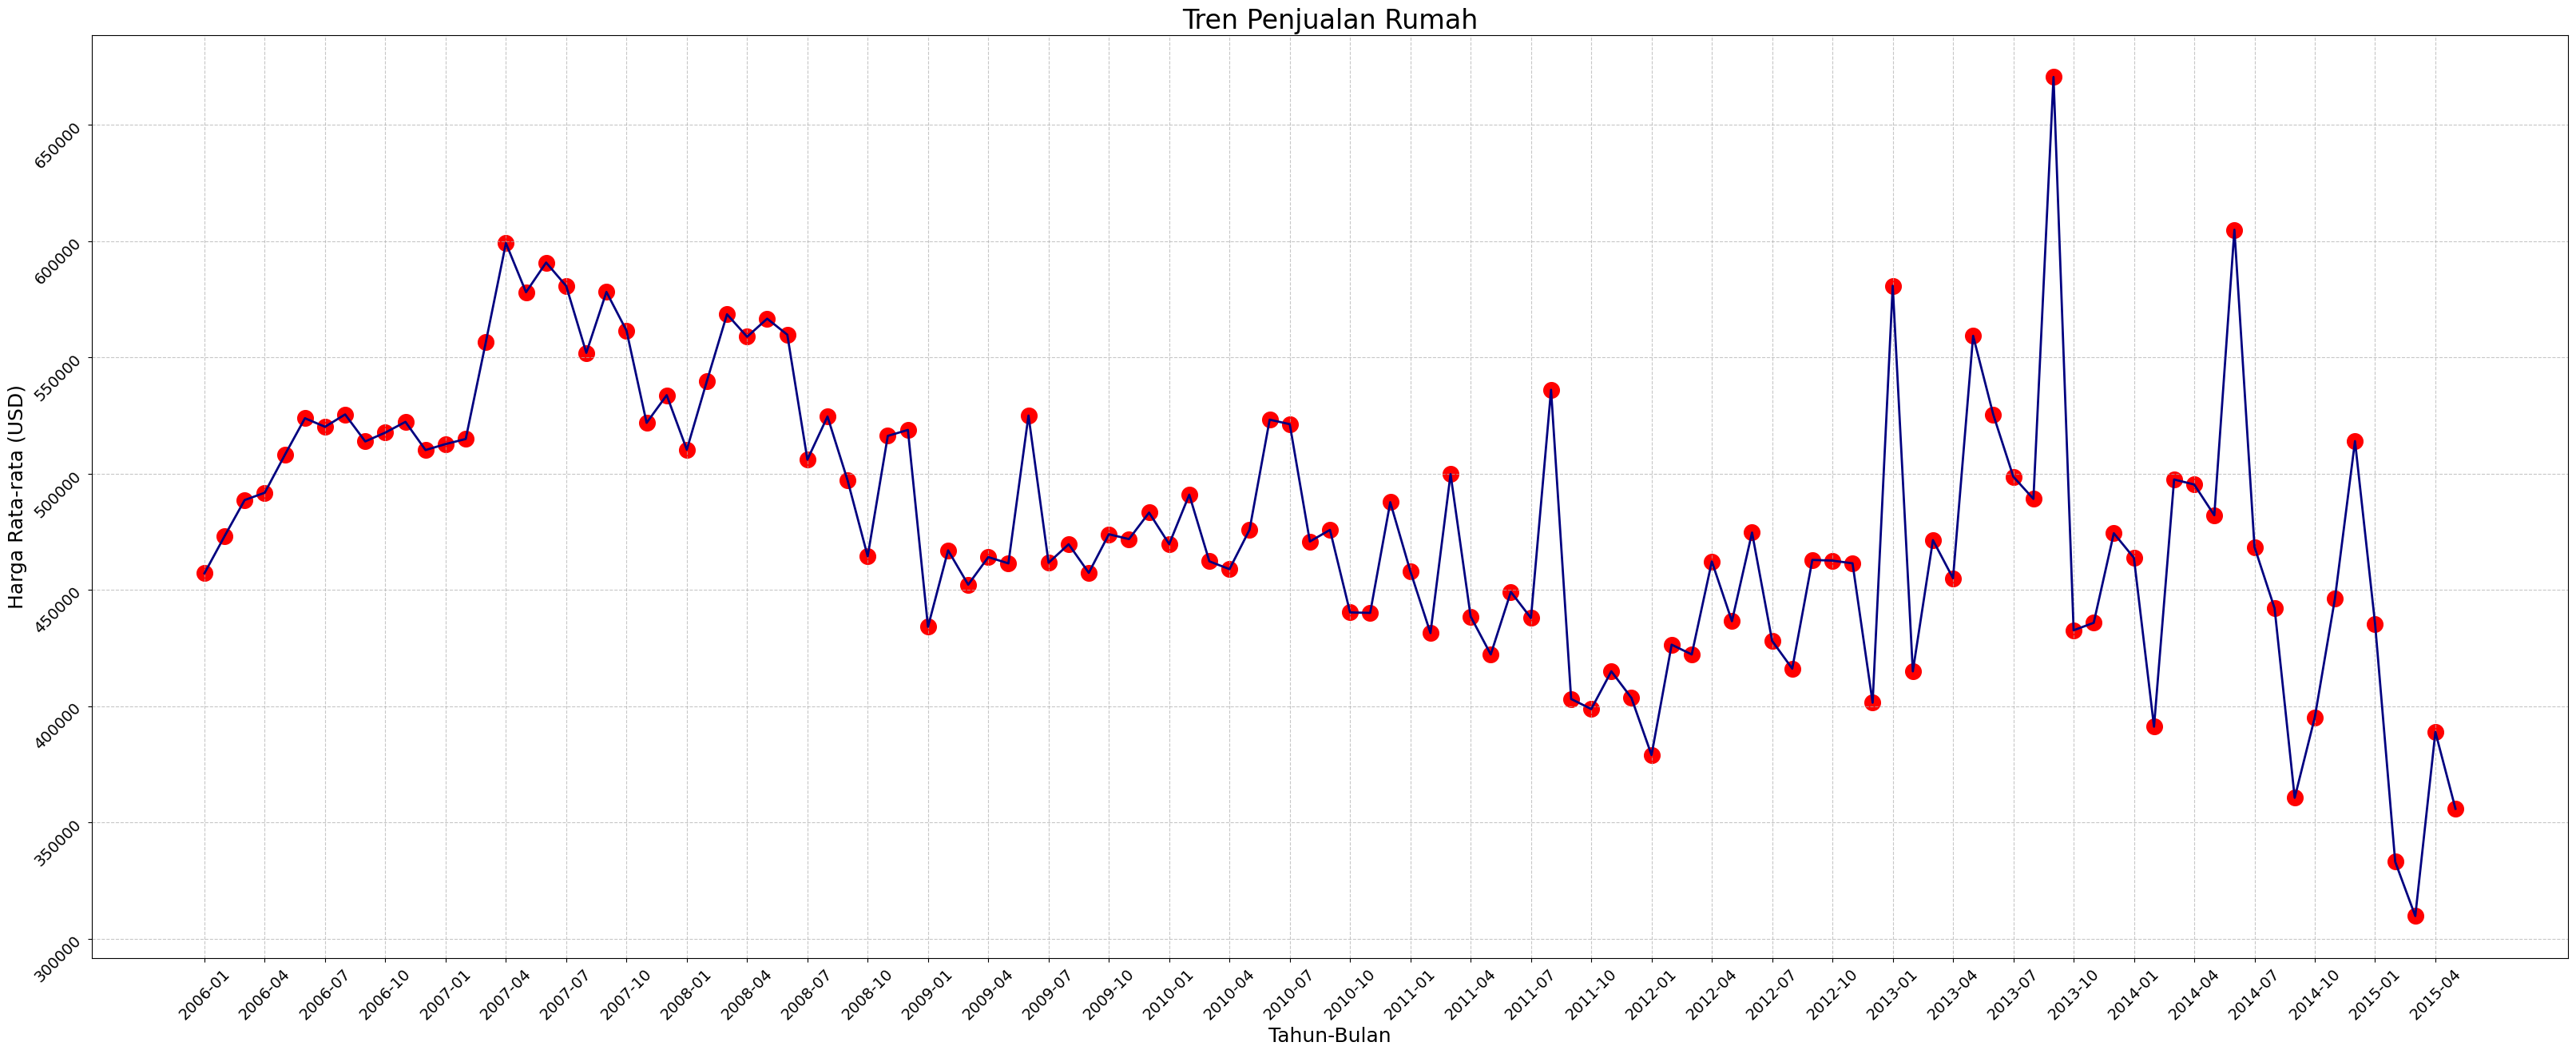

In [ ]:
# Tren Harga Jual Rumah
sales_tren = house_df.groupby([house_df['SaleStartDate'].dt.year,
                               house_df['SaleStartDate'].dt.month])['SalePrice'].mean()

# Scatter chart
fig, ax = plt.subplots(figsize=(40, 15))

# Convert the MultiIndex to a list of strings for plotting
x_values = [f"{year}-{month:02}" for year, month in sales_tren.index]

# Now plot using the x_values list
ax.scatter(x_values, sales_tren.values, c="red", s=200, marker='o')
ax.plot(x_values, sales_tren.values, color="navy", linewidth=2)
ax.set_title('Tren Penjualan Rumah', fontsize=24, loc='center')
ax.set_ylabel('Harga Rata-rata (USD)', fontsize=18)
ax.set_xlabel('Tahun-Bulan', fontsize=18)
ax.tick_params(axis='x', labelsize=14, rotation=45)
ax.tick_params(axis='y', labelsize=14, rotation=45)
ax.set_xticks(x_values[::3])

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Insight:**
*   Harga rumah mengalami tren naik pada 2006 - 2007, tetapi jatuh tajam akibat krisis ekonomi 2008-2009.
*   Setelah 2010, harga mulai pulih, tetapi tetap fluktuatif dengan beberapa lonjakan yang tajam.
*   Lonjakan kenaikan harga jual juga terjadi pada Agustus-September 2013, lalu mengalami penurunan yang drastis dari September-Oktober di tahun yang sama.
*   Pada 2015, harga rumah kembali mengalami penurunan yang signifikan.
*   Harga rata-rata tertinggi penjualan rumah terjadi pada September 2013 dan terendah pada Maret 2015.





### **2. Apakah ada hubungan antara ukuran lahan dan harga jual rumah?**

Hubungan antara Ukuran Lahan dan Harga Jual Rumah: 0.13476695639483857


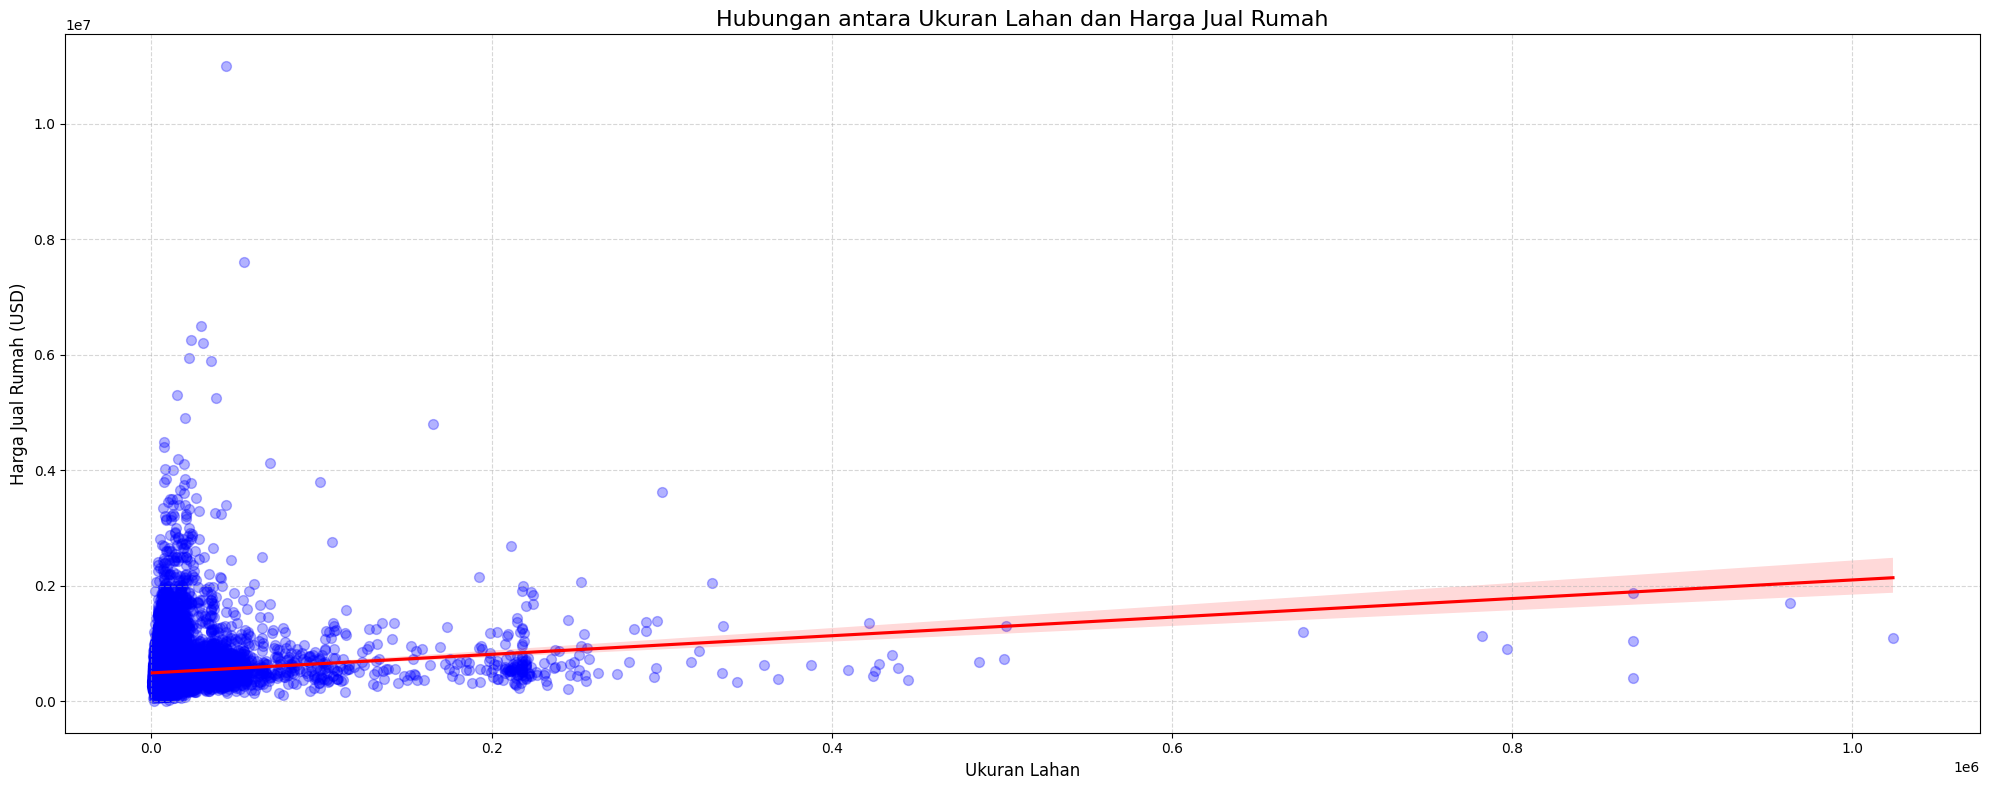

In [ ]:
correlations = house_df[['SalePrice', 'SqFtLot']].corr()['SalePrice'][['SqFtLot']]
print(f"Hubungan antara Ukuran Lahan dan Harga Jual Rumah: {correlations.values[0]}")

# Create the scatter plot
plt.figure(figsize=(20, 8))
sns.regplot(x='SqFtLot', y='SalePrice', data=house_df,
            scatter_kws={'color': 'blue', 's': 50, 'alpha': 0.3},
            line_kws={'color': 'red'})
plt.title('Hubungan antara Ukuran Lahan dan Harga Jual Rumah', fontsize=16)
plt.xlabel('Ukuran Lahan', fontsize=12)
plt.ylabel('Harga Jual Rumah (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

**Insight:**
*   Secara umum, ukuran lahan memang berpengaruh terhadap harga rumah, tetapi bukan faktor utama karena hubungan positif antara ukuran lahan dengan harga jual rumah cukup lemah dengan persentase sebesar 13,47%.
*   Untuk investasi properti, jangan hanya mempertimbangkan ukuran lahan, tetapi juga aspek lain seperti lokasi strategis dan pengembangan properti di sekitarnya.




### **3. Bagaimana perbandingan harga rumah berdasarkan jenis properti?**

<ipython-input-26-9987851f73cd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=house_df, x='PropertyType', y='SalePrice', palette='plasma')


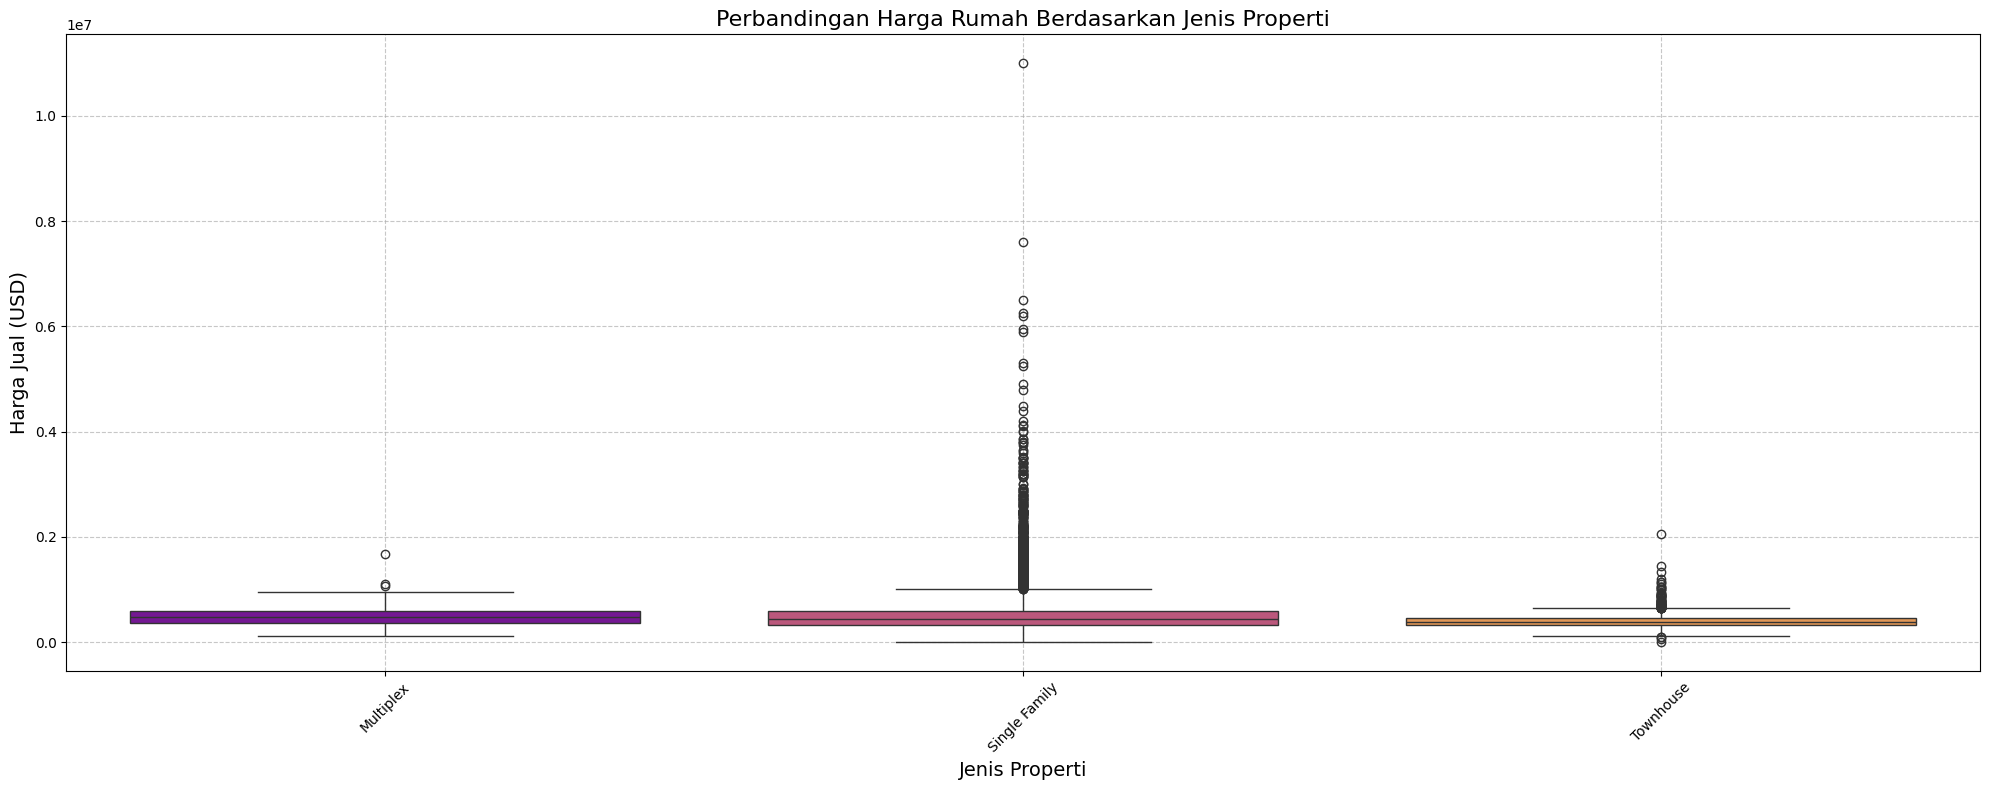

In [ ]:
# Membuat figure dengan ukuran yang sesuai
plt.figure(figsize=(20, 8))

# Membuat boxplot untuk membandingkan harga rumah berdasarkan jenis properti
sns.boxplot(data=house_df, x='PropertyType', y='SalePrice', palette='plasma')

# Menambahkan judul pada visualisasi
plt.title('Perbandingan Harga Rumah Berdasarkan Jenis Properti', fontsize=16)

# Memberikan label untuk sumbu X dan Y
plt.xlabel('Jenis Properti', fontsize=14)
plt.ylabel('Harga Jual (USD)', fontsize=14)

# Memutar label sumbu X agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menambahkan grid untuk mempermudah interpretasi
plt.grid(True, linestyle='--', alpha=0.7)

# Mengatur tata letak agar elemen visualisasi tidak bertumpuk
plt.tight_layout()

# Menyimpan gambar hasil visualisasi dalam file PNG dengan resolusi tinggi
plt.savefig('perbandingan_harga_jenis.png', dpi=300, bbox_inches='tight')

# Menampilkan plot
plt.show()

**Insight:**
*   Jika mencari properti dengan harga yang paling bervariasi dan potensi nilai jual tinggi, maka Single Family adalah pilihan utama.
*   Jika ingin properti dengan harga yang lebih stabil dan lebih sedikit fluktuasi, Townhouse adalah pilihan yang lebih aman.
*   Multiplex berada di antara keduanya dengan harga yang relatif stabil, tetapi tetap memiliki beberapa properti bernilai tinggi.






### **4. Faktor apa yang paling mempengaruhi harga jual rumah di pasar saat ini?**

<ipython-input-27-12d3e3c6738a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='plasma')


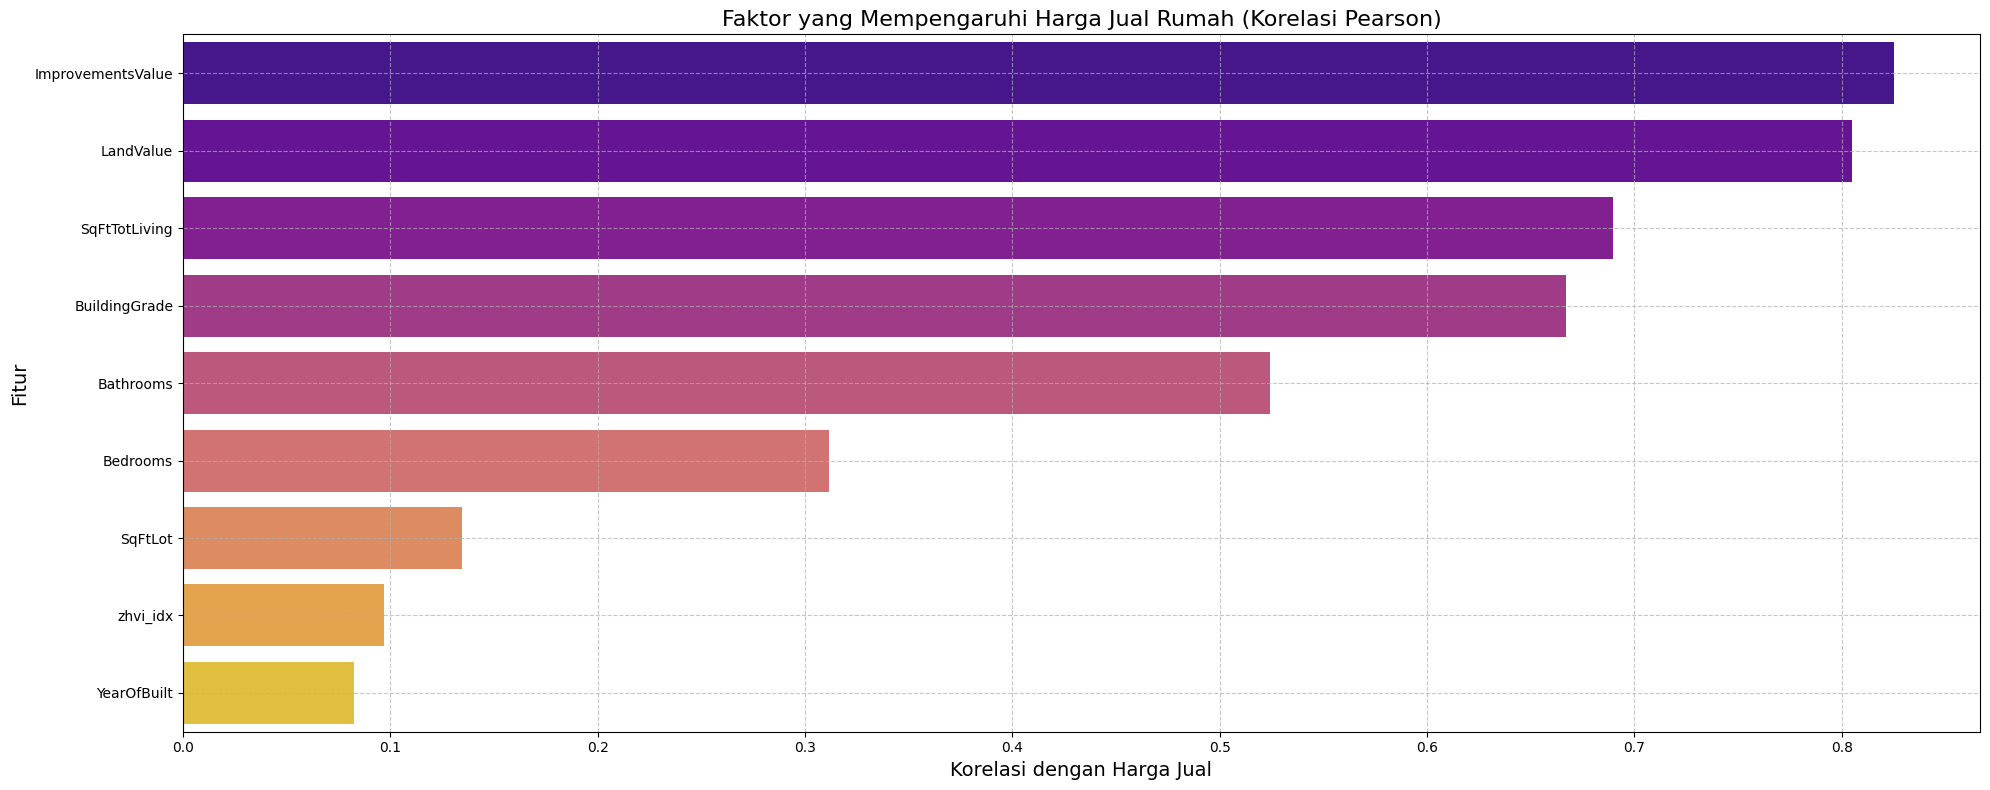

In [ ]:
# Memilih kolom yang relevan
relevant_cols = ['SqFtLot', 'SqFtTotLiving', 'Bathrooms', 'Bedrooms', 'BuildingGrade',
            'YearOfBuilt', 'LandValue', 'ImprovementsValue', 'zhvi_idx']

# Menghitung korelasi antara fitur numerik dengan SalePrice
correlation_matrix = house_df[relevant_cols + ['SalePrice']].corr()[
    'SalePrice'].drop('SalePrice').sort_values(ascending=False)

# Mengubah hasil korelasi menjadi DataFrame
feature_importance = pd.DataFrame({
    'Feature': correlation_matrix.index,
    'Importance': correlation_matrix.values
})

# Visualisasi hasil korelasi
plt.figure(figsize=(20, 8))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='plasma')

# Menambahkan judul dan label sumbu
plt.title('Faktor yang Mempengaruhi Harga Jual Rumah (Korelasi Pearson)', fontsize=16,)
plt.xlabel('Korelasi dengan Harga Jual', fontsize=14)
plt.ylabel('Fitur', fontsize=14)

# Menambahkan garis bantu grid
plt.grid(True, linestyle='--', alpha=0.7)

# Menyesuaikan tata letak agar lebih rapi
plt.tight_layout()

# Menyimpan hasil visualisasi
plt.savefig('faktor_pengaruh_harga_korelasi.png', dpi=300, bbox_inches='tight')

# Menampilkan plot
plt.show()

**Insight:**
*   Faktor paling utama yang mempengaruhi harga jual rumah di pasar saat ini adalah nilai perbaikan/renovasi dan nilai tanah.
*   Faktor lain seperti total luas area hunian, nilai kualitas keseluruhan bangunan, total kamar mandi dan kamar tidur, luas tanah,, indeks nilai rumah zillow rata-rata, tahun dibangun juga berkontribusi, tetapi dengan pengaruh yang lebih kecil dibandingkan faktor sebelumnya.

### **5. Bagaimana pengaruh indeks nilai rumah terhadap harga jual properti?**

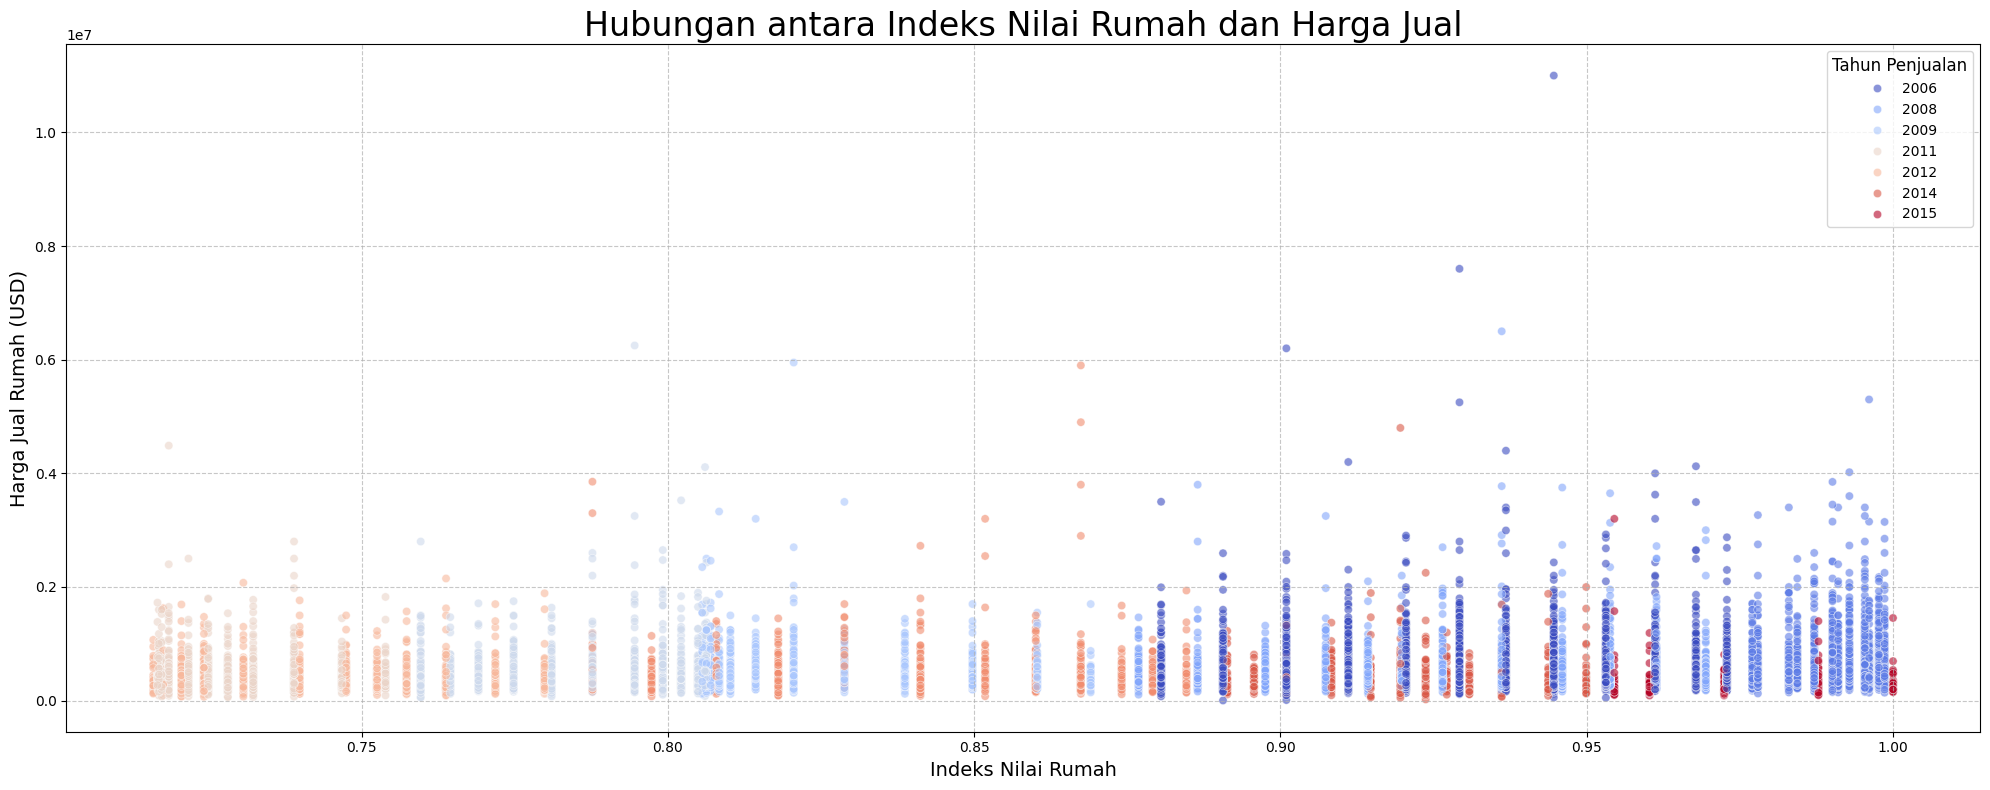

In [ ]:
# Ukuran figure
plt.figure(figsize=(20, 8))

# Scatter plot antara zhvi_idx dan SalePrice dengan warna berdasarkan tahun penjualan
sns.scatterplot(
    data=house_df,                # Menggunakan dataset utama
    x='zhvi_idx',                 # Sumbu X adalah Indeks Nilai Rumah
    y='SalePrice',                # Sumbu Y adalah Harga Jual Properti
    alpha=0.6,                     # Mengatur transparansi titik agar tidak terlalu padat
    hue=house_df['TransactionDate'].dt.year,  # Pewarnaan berdasarkan tahun penjualan
    palette='coolwarm'             # Palet warna untuk membedakan tahun
)

# Menambahkan judul dan label
plt.title('Hubungan antara Indeks Nilai Rumah dan Harga Jual', fontsize=24)
plt.xlabel('Indeks Nilai Rumah', fontsize=14)
plt.ylabel('Harga Jual Rumah (USD)', fontsize=14)

# Menambahkan legenda dengan judul
plt.legend(title='Tahun Penjualan', title_fontsize=12)

# Menambahkan grid agar lebih mudah dibaca
plt.grid(True, linestyle='--', alpha=0.7)

# Menyesuaikan tata letak agar lebih rapi
plt.tight_layout()

# Menampilkan plot
plt.show()

**Insight:**
*   Indeks nilai rumah berpengaruh positif terhadap harga penjualan yang berarti semakin tinggi indeksnya, maka semakin tinggi harga jual rumah tersebut.
*   Properti yang dijual pada tahun yang lebih baru cenderung memiliki harga lebih tinggi dibandingkan dengan properti yang dijual pada tahun yang lebih lama. Hal tersebut dapat terjadi karena tren pasar perumahan dari tahun ke tahun.





## **Utilization of Analysis Results**

**Bagi Pembeli Rumah:**
*   Pilih jenis properti sesuai dengan anggaran yang dimiliki dan kebutuhan (Townhouse & Multiplex lebih stabil, Single Family lebih bervariasi).
*   Jangan hanya fokus pada ukuran lahan, perhatikan faktor lokasi, akses fasilitas umum, dan kondisi pasar penjualan rumah.
*   Pertimbangkan tren harga properti sebelum membeli—hindari pembelian pada puncak harga pasar penjualan rumah.



**Bagi Penjual dan Investor Properti:**
*   Jika ingin mendapatkan harga optimal, jual properti saat tren harga penjualan sedang naik.
*   Perhatikan siklus ekonomi karena krisis keuangan dan inflasi dapat mempengaruhi harga properti secara drastis.
*   Investasi pada jenis properti Single Family dapat berisiko tinggi, tetapi memiliki potensi keuntungan yang lebih besar.



**Bagi Pengembang dan Perencana Kota:**
*   Kebijakan pembangunan properti harus mempertimbangkan tren harga dan permintaan pasar.
*   Peningkatan aksesibilitas dan fasilitas di sekitar area perumahan dengan properti terjangkau dapat meningkatkan harga jual.

